In [1]:
isMaster = True
from app.dotenv import base_dir, data_dir
from app.load_data import *
from app.change_detect.opticalflow import *
from app.object_detection.cropROI import *




video_fname = 'vtest.avi'
save_path = f'{data_dir}\{video_fname.split(".")[0]}'
print(f'images path: {save_path}')
baseModel = 'MOG2'#'consecutive_frame'

images path: c:\Users\yili0901\Desktop\code\identify_static_video_changes\data\vtest


load yolo model

In [2]:
from app.object_detection.yolo import saveYOLOv5Model, saveYOLOv8Model
from app.object_detection.yolo import loadYOLOv8Model 
from app.object_detection.yolo import inferenceYOLOv8Model,plotClassifcation


# saveYOLOv5Model(data_dir)
saveYOLOv8Model(data_dir)
model = loadYOLOv8Model(data_dir)

Model weights already saved to c:\Users\yili0901\Desktop\code\identify_static_video_changes\data/yolov8s_weights.pt
Model YOLO V8 weights loaded successfully


#### parse images from video

In [3]:

from app.load_data import *

if not (os.path.exists(save_path) and len(os.listdir(save_path)) > 0):
    saveVideoFrames(video_path = f"{data_dir}/{video_fname}",save_path = save_path)
num_frames = len(os.listdir(save_path))

#### detect

possible background substraction model: dict_keys(['MOG2', 'KNN', 'CNT', 'LSBP', 'GSOC', 'PBAS'])
selected baseModel: MOG2
MOG2 background substraction complete.


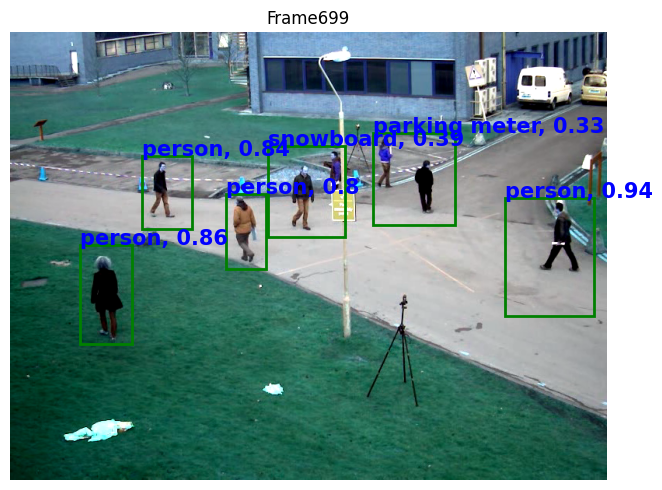

MOG2 background substraction complete.


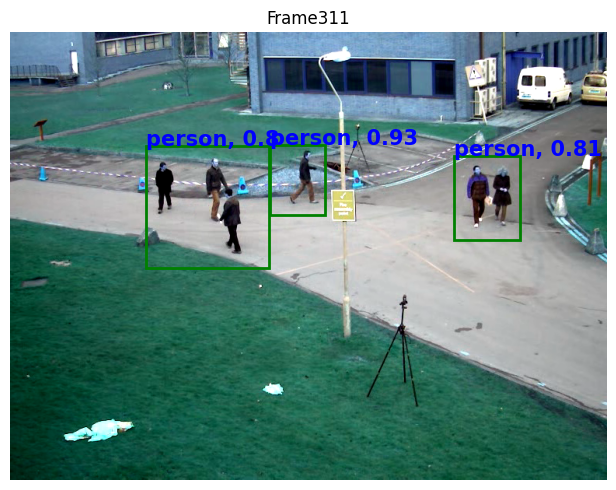

MOG2 background substraction complete.


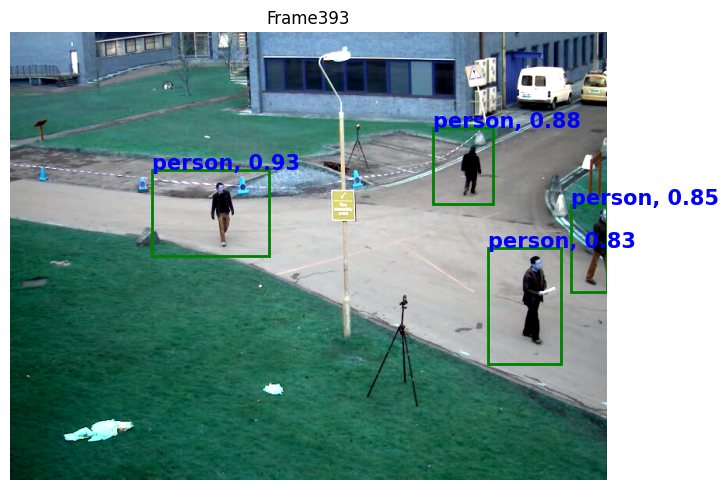

MOG2 background substraction complete.


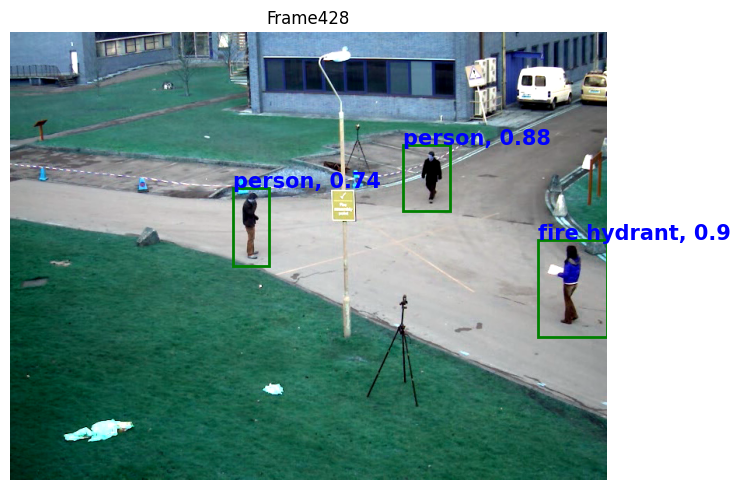

MOG2 background substraction complete.


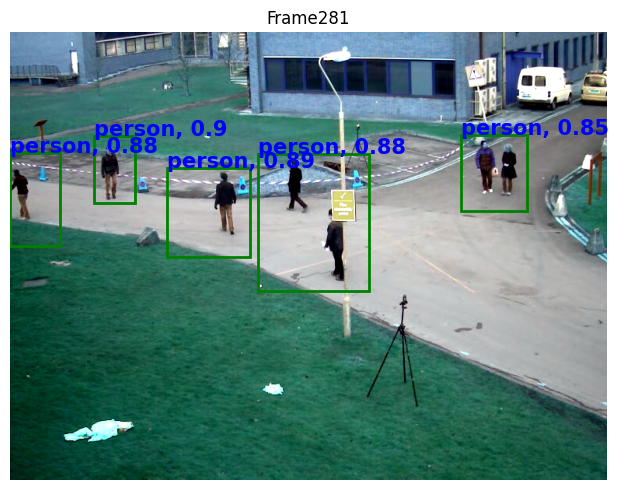

MOG2 background substraction complete.


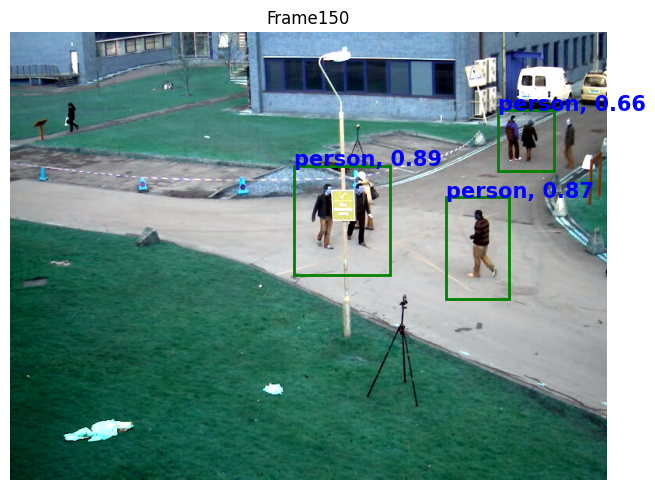

MOG2 background substraction complete.


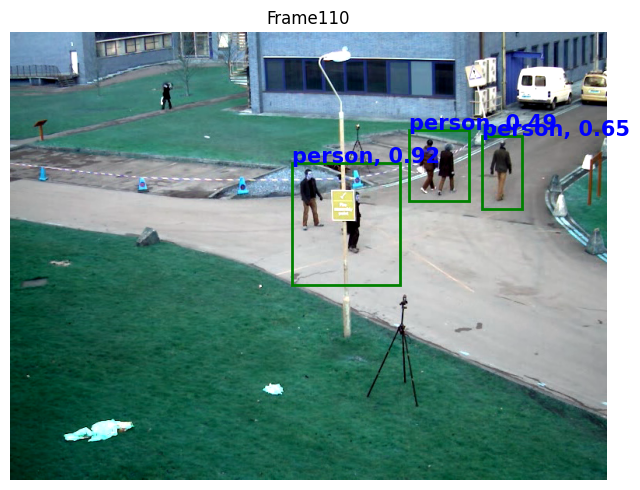

MOG2 background substraction complete.


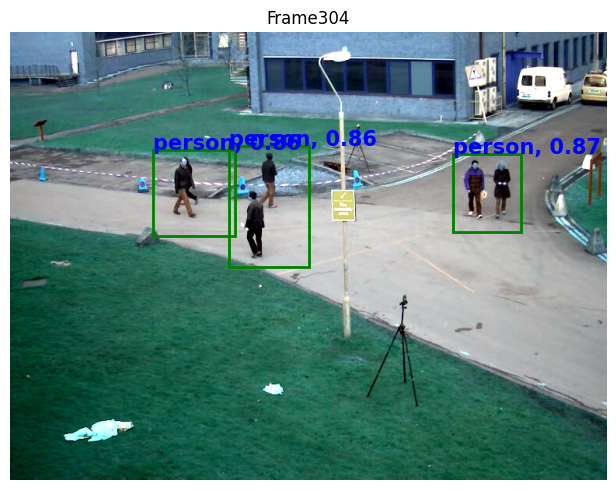

MOG2 background substraction complete.


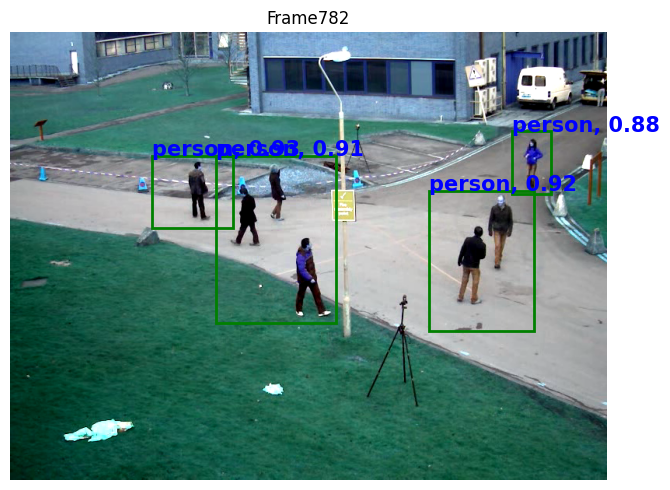

MOG2 background substraction complete.


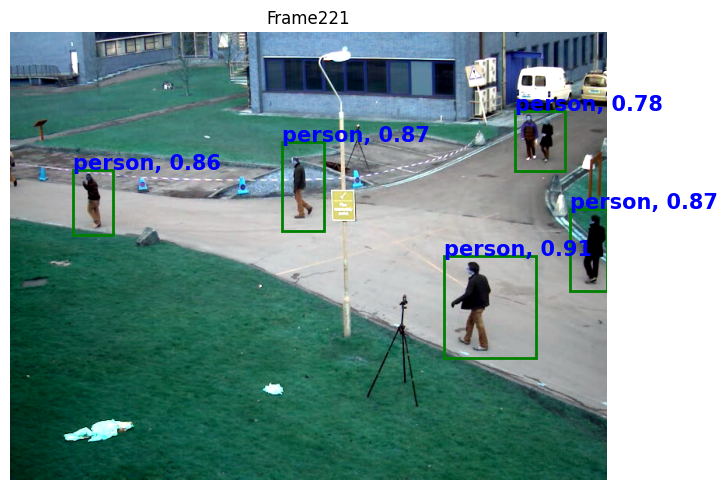

In [5]:
from random import sample
from app.change_detect.background_baseline.background_subtractors import apply_bg_subtraction,save_background_model,methods
import os
print(f'possible background substraction model: {methods.keys()}')
print(f'selected baseModel: {baseModel}')

for frame_num in sample(list(range(num_frames)), 10):
    next_rgb = loadFrame(save_path =f"{save_path}/{frame_num}.png")
    
    # load the base model for change detection
    if baseModel == 'consecutive_frame':  # consecutive frame used as background baseModel for change detection
        baseModel_rgb = loadFrame(save_path = f"{save_path}/{frame_num-1}.png")
    else:  # background model used for change detection

        # create background model if not existing
        folder_train_add = save_path
        %run background_subtractors.ipynb

        baseModel_fname = os.path.join(f'{data_dir}\{video_fname.split(".")[0]}/background_models', f'background_model_{baseModel}.png')
        baseModel_rgb = loadFrame(baseModel_fname)
        
    
    
    # run jupyter notebook using magic
    # print(frame_num)
    %run detecting_sudden_scene_change.ipynb
    # print(roi_detected)
    plotClassifcation(roi_coords, next_rgb,roi_detected,frame_num)
    
    # break
    # fig.canvas.draw()
    # img = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)
    # img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))  # Convert to (H, W, 3)

    # # Convert RGB to BGR for OpenCV
    # img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    # # Display the image using OpenCV
    # cv2.imshow("Figure", img_bgr)